In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Problem Statement

- Problem 1: There are various stocks for which we have collected a data set, which all stocks are apparently similar in performance

- Problem 2: How many Unique patterns that exist in the historical stock data set, based on fluctuations in price.

- Problem 3: Identify which all stocks are moving together and which all stocks are different from each other.

In [4]:
data = pd.read_csv('data_stocks.csv')

In [5]:
data.shape

(41266, 502)

In [6]:
data.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [7]:
data.describe()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
count,4.126600e+04,41266.000000,41266.000000,41266.000000,41266.00000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,...,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000
mean,1.497749e+09,2421.537882,47.708346,150.453566,141.31793,79.446873,103.480398,102.998608,50.894352,122.981163,...,97.942211,104.740666,46.664402,43.043984,80.784595,19.300718,54.541988,71.757891,121.423515,60.183874
std,3.822211e+06,39.557135,3.259377,6.236826,6.91674,2.000283,4.424244,9.389788,4.833931,11.252010,...,5.411795,10.606694,1.508444,1.714533,1.840989,11.686532,3.526321,4.038272,5.607070,3.346887
min,1.491226e+09,2329.139900,40.830000,140.160000,128.24000,74.800000,95.870000,83.000000,44.650000,96.250000,...,83.410000,89.510000,44.090000,39.120000,76.060000,6.660000,48.820000,63.180000,110.120000,52.300000
25%,1.494432e+09,2390.860100,44.945400,144.640000,135.19500,78.030000,101.300000,94.820000,47.440000,116.950000,...,95.960000,95.010000,45.155000,41.955000,80.220000,7.045000,51.630000,69.110000,117.580000,59.620000
50%,1.497638e+09,2430.149900,48.360000,149.945000,142.26000,79.410000,102.440000,106.820000,49.509900,123.620000,...,99.250000,99.660000,46.810000,43.200000,81.150000,27.890000,53.850000,73.470000,120.650000,61.585600
75%,1.501090e+09,2448.820100,50.180000,155.065000,147.10000,80.580000,104.660000,110.490000,52.230000,132.218800,...,102.080000,117.034700,47.730000,44.370000,82.062050,30.470000,57.140000,74.750000,126.000000,62.540000
max,1.504210e+09,2490.649900,54.475000,164.510000,155.33000,90.440000,121.770000,119.270000,62.560000,142.875000,...,106.375000,123.870000,49.660000,47.210000,83.630000,32.930000,62.130000,77.120000,133.450000,63.840000


# Problem 1: There are various stocks for which we have collected a data set, which all stocks are apparently similar in performance

In [198]:
stock_data =data.iloc[:,2:]

In [9]:
stock_data.head(2)

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,42.33,143.68,129.63,82.04,102.23,85.22,59.76,121.52,38.99,14.61,...,84.37,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.00,53.35
1,42.36,143.70,130.32,82.08,102.14,85.65,59.84,121.48,39.01,14.71,...,84.37,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.77,53.35


In [31]:
stock_data.corr()

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
NASDAQ.AAL,1.000000,0.082065,0.542213,0.209446,0.245801,0.610881,-0.441142,0.009581,0.681863,0.272518,...,0.798624,-0.744085,0.284370,0.810955,-0.070950,0.522341,0.395730,0.642336,0.588241,0.753567
NASDAQ.AAPL,0.082065,1.000000,0.714578,0.264269,0.265641,0.645233,-0.712522,0.326712,0.545541,-0.238091,...,0.306664,-0.250959,0.738655,0.266994,-0.671488,0.341687,0.693062,0.627531,-0.580055,0.442600
NASDAQ.ADBE,0.542213,0.714578,1.000000,0.259282,0.476496,0.872353,-0.759604,0.488717,0.733609,0.201821,...,0.718851,-0.792876,0.850709,0.722161,-0.758967,0.806615,0.911106,0.939185,-0.067235,0.776052
NASDAQ.ADI,0.209446,0.264269,0.259282,1.000000,-0.085074,0.470756,-0.323603,-0.409747,0.504019,0.042083,...,0.203224,-0.160317,0.308948,0.050697,-0.024428,-0.017967,0.067258,0.261173,0.130786,0.351893
NASDAQ.ADP,0.245801,0.265641,0.476496,-0.085074,1.000000,0.325630,-0.229119,0.572143,0.099934,0.447506,...,0.321414,-0.438662,0.443773,0.347293,-0.463670,0.589464,0.634191,0.418591,-0.201805,0.160213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NYSE.XRX,0.522341,0.341687,0.806615,-0.017967,0.589464,0.577194,-0.542393,0.696062,0.371468,0.450787,...,0.605548,-0.867222,0.636184,0.717401,-0.623126,1.000000,0.866193,0.785073,0.081512,0.588426
NYSE.XYL,0.395730,0.693062,0.911106,0.067258,0.634191,0.701701,-0.668413,0.679090,0.485314,0.261115,...,0.548014,-0.737225,0.811981,0.610465,-0.798461,0.866193,1.000000,0.842826,-0.246085,0.581894
NYSE.YUM,0.642336,0.627531,0.939185,0.261173,0.418591,0.915175,-0.863792,0.343294,0.770276,0.083384,...,0.825260,-0.862418,0.855050,0.763547,-0.634492,0.785073,0.842826,1.000000,0.018217,0.899693
NYSE.ZBH,0.588241,-0.580055,-0.067235,0.130786,-0.201805,0.016689,0.212780,-0.259731,0.236575,0.417055,...,0.369747,-0.322979,-0.310343,0.339366,0.458027,0.081512,-0.246085,0.018217,1.000000,0.271767


In [10]:
cor = stock_data.corr()

In [11]:
cor.iloc[0,0]
cor.index[1]

'NASDAQ.AAPL'

In [46]:
cor[cor.iloc[:,0] > 0.8]

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
NASDAQ.AAL,1.000000,0.082065,0.542213,0.209446,0.245801,0.610881,-0.441142,0.009581,0.681863,0.272518,...,0.798624,-0.744085,0.284370,0.810955,-0.070950,0.522341,0.395730,0.642336,0.588241,0.753567
NASDAQ.AMZN,0.803319,0.370111,0.730719,0.386619,0.252712,0.828757,-0.648854,0.059345,0.897693,0.170978,...,0.879967,-0.733852,0.530139,0.804398,-0.203979,0.533584,0.503878,0.793529,0.419472,0.872246
NASDAQ.EXPE,0.812206,0.379622,0.818384,0.218189,0.369697,0.834440,-0.707045,0.296553,0.817588,0.199334,...,0.931258,-0.825230,0.591514,0.859042,-0.368192,0.712184,0.658203,0.883902,0.347660,0.913009
NASDAQ.HAS,0.832713,-0.274890,0.251696,0.252954,-0.030201,0.394658,-0.206013,-0.208923,0.530874,0.258187,...,0.698866,-0.609800,0.035341,0.625126,0.264187,0.306630,0.055201,0.406760,0.839854,0.651842
NYSE.CMI,0.810391,0.088336,0.528227,0.206259,0.179664,0.577301,-0.458993,0.140823,0.690999,0.184153,...,0.803020,-0.677137,0.226787,0.767652,-0.003402,0.521924,0.370814,0.616157,0.581472,0.753369
NYSE.COH,0.837497,0.161166,0.476242,0.257488,0.111937,0.632158,-0.575362,-0.061769,0.698357,0.040742,...,0.785964,-0.622571,0.270847,0.718301,0.088650,0.407912,0.305606,0.624507,0.488613,0.785750
NYSE.CSRA,0.803510,0.334035,0.832643,0.154026,0.497718,0.768976,-0.616766,0.386223,0.696207,0.346399,...,0.837405,-0.927944,0.649768,0.877170,-0.446198,0.843635,0.770891,0.878215,0.308781,0.810754
NYSE.DAL,0.908578,-0.016610,0.452003,0.194325,0.012064,0.537964,-0.444039,-0.056278,0.628435,0.170080,...,0.776583,-0.736920,0.200001,0.750989,0.051927,0.469302,0.278065,0.610742,0.662851,0.787479
NYSE.DE,0.850040,0.305125,0.677498,0.282661,0.463447,0.787228,-0.649532,0.083421,0.710929,0.205290,...,0.834250,-0.820615,0.571294,0.805954,-0.210496,0.630953,0.587302,0.802758,0.304364,0.809627
NYSE.FBHS,0.816213,-0.126611,0.429645,0.011530,0.310310,0.402018,-0.212418,0.279779,0.465293,0.404898,...,0.772558,-0.655985,0.099429,0.801572,0.020292,0.587787,0.347267,0.497662,0.644646,0.589896


In [17]:
cor[cor.iloc[:,0] > 0.8].index

Index(['NASDAQ.AAL', 'NASDAQ.AMZN', 'NASDAQ.EXPE', 'NASDAQ.HAS', 'NYSE.CMI',
       'NYSE.COH', 'NYSE.CSRA', 'NYSE.DAL', 'NYSE.DE', 'NYSE.FBHS', 'NYSE.GLW',
       'NYSE.IT', 'NYSE.ITW', 'NYSE.IVZ', 'NYSE.MCK', 'NYSE.NWL', 'NYSE.PKI',
       'NYSE.ROP', 'NYSE.SWK', 'NYSE.TEL', 'NYSE.WRK', 'NYSE.XL'],
      dtype='object')

In [60]:
a=dict()
a[0] = list(cor[cor.iloc[:,0] > 0.8].index)

In [62]:
c = list(cor.index)

In [65]:
c

['NASDAQ.AAL',
 'NASDAQ.AAPL',
 'NASDAQ.ADBE',
 'NASDAQ.ADI',
 'NASDAQ.ADP',
 'NASDAQ.ADSK',
 'NASDAQ.AKAM',
 'NASDAQ.ALXN',
 'NASDAQ.AMAT',
 'NASDAQ.AMD',
 'NASDAQ.AMGN',
 'NASDAQ.AMZN',
 'NASDAQ.ATVI',
 'NASDAQ.AVGO',
 'NASDAQ.BBBY',
 'NASDAQ.BIIB',
 'NASDAQ.CA',
 'NASDAQ.CBOE',
 'NASDAQ.CELG',
 'NASDAQ.CERN',
 'NASDAQ.CHRW',
 'NASDAQ.CHTR',
 'NASDAQ.CINF',
 'NASDAQ.CMCSA',
 'NASDAQ.CME',
 'NASDAQ.COST',
 'NASDAQ.CSCO',
 'NASDAQ.CSX',
 'NASDAQ.CTAS',
 'NASDAQ.CTSH',
 'NASDAQ.CTXS',
 'NASDAQ.DISCA',
 'NASDAQ.DISCK',
 'NASDAQ.DISH',
 'NASDAQ.DLTR',
 'NASDAQ.EA',
 'NASDAQ.EBAY',
 'NASDAQ.EQIX',
 'NASDAQ.ESRX',
 'NASDAQ.ETFC',
 'NASDAQ.EXPD',
 'NASDAQ.EXPE',
 'NASDAQ.FAST',
 'NASDAQ.FB',
 'NASDAQ.FFIV',
 'NASDAQ.FISV',
 'NASDAQ.FITB',
 'NASDAQ.FLIR',
 'NASDAQ.FOX',
 'NASDAQ.FOXA',
 'NASDAQ.GILD',
 'NASDAQ.GOOG',
 'NASDAQ.GOOGL',
 'NASDAQ.GRMN',
 'NASDAQ.GT',
 'NASDAQ.HAS',
 'NASDAQ.HBAN',
 'NASDAQ.HOLX',
 'NASDAQ.HSIC',
 'NASDAQ.IDXX',
 'NASDAQ.ILMN',
 'NASDAQ.INCY',
 'NASDAQ.INFO',
 'NA

In [79]:
l= list(['a','b'])
l.append(['c',['d']])
import itertools
list(itertools.chain.from_iterable(l))

['a', 'b', 'c', ['d']]

In [39]:
range(len(cor.columns)) 

range(0, 500)

In [49]:
cor.columns[1] not in ['NASDAQ.AAL','NASDAQ.AAL']

True

In [73]:
a=dict()
b=0
d = list()
for i in range(len(cor.columns)) :
    
    if len(a) == 0 :
        a[i] = list(cor[cor.iloc[:,i] > 0.8].index)
        
        for h in a[i] :
            d.append(h) 
            #print(d)
        
    else :
        if cor.columns[i]  in d :
            continue
                
            
        else :
            #print('continue ',i)
            a[i] = list(cor[cor.iloc[:,i] > 0.8].index)
            for h in a[i] :
                d.append(h) 
                #print(d)
            
    

In [72]:
a

{0: ['NASDAQ.AAL',
  'NASDAQ.AMZN',
  'NASDAQ.EXPE',
  'NASDAQ.HAS',
  'NYSE.CMI',
  'NYSE.COH',
  'NYSE.CSRA',
  'NYSE.DAL',
  'NYSE.DE',
  'NYSE.FBHS',
  'NYSE.GLW',
  'NYSE.IT',
  'NYSE.ITW',
  'NYSE.IVZ',
  'NYSE.MCK',
  'NYSE.NWL',
  'NYSE.PKI',
  'NYSE.ROP',
  'NYSE.SWK',
  'NYSE.TEL',
  'NYSE.WRK',
  'NYSE.XL'],
 1: ['NASDAQ.AAPL',
  'NASDAQ.EQIX',
  'NASDAQ.SNPS',
  'NYSE.COL',
  'NYSE.CRM',
  'NYSE.DXC',
  'NYSE.TSS'],
 2: ['NASDAQ.ADBE',
  'NASDAQ.ADSK',
  'NASDAQ.ATVI',
  'NASDAQ.AVGO',
  'NASDAQ.CBOE',
  'NASDAQ.CTAS',
  'NASDAQ.CTSH',
  'NASDAQ.EA',
  'NASDAQ.EQIX',
  'NASDAQ.ETFC',
  'NASDAQ.EXPE',
  'NASDAQ.FB',
  'NASDAQ.ISRG',
  'NASDAQ.LKQ',
  'NASDAQ.LRCX',
  'NASDAQ.MCHP',
  'NASDAQ.MNST',
  'NASDAQ.MSFT',
  'NASDAQ.NVDA',
  'NASDAQ.PYPL',
  'NASDAQ.REGN',
  'NASDAQ.SNPS',
  'NASDAQ.TROW',
  'NASDAQ.VRSN',
  'NASDAQ.VRTX',
  'NASDAQ.WLTW',
  'NYSE.A',
  'NYSE.ABBV',
  'NYSE.ABT',
  'NYSE.ACN',
  'NYSE.AET',
  'NYSE.AFL',
  'NYSE.ALL',
  'NYSE.AME',
  'NYSE.AMT',
  '

In [69]:
cor[cor.iloc[:,1] > 0.8].index

Index(['NASDAQ.AAPL', 'NASDAQ.EQIX', 'NASDAQ.SNPS', 'NYSE.COL', 'NYSE.CRM',
       'NYSE.DXC', 'NYSE.TSS'],
      dtype='object')

In [79]:
print("List of stocks apparently similar in performance ")

List of stocks apparently similar in performance 


In [80]:
a.values()

dict_values([['NASDAQ.AAL', 'NASDAQ.AMZN', 'NASDAQ.EXPE', 'NASDAQ.HAS', 'NYSE.CMI', 'NYSE.COH', 'NYSE.CSRA', 'NYSE.DAL', 'NYSE.DE', 'NYSE.FBHS', 'NYSE.GLW', 'NYSE.IT', 'NYSE.ITW', 'NYSE.IVZ', 'NYSE.MCK', 'NYSE.NWL', 'NYSE.PKI', 'NYSE.ROP', 'NYSE.SWK', 'NYSE.TEL', 'NYSE.WRK', 'NYSE.XL'], ['NASDAQ.AAPL', 'NASDAQ.EQIX', 'NASDAQ.SNPS', 'NYSE.COL', 'NYSE.CRM', 'NYSE.DXC', 'NYSE.TSS'], ['NASDAQ.ADBE', 'NASDAQ.ADSK', 'NASDAQ.ATVI', 'NASDAQ.AVGO', 'NASDAQ.CBOE', 'NASDAQ.CTAS', 'NASDAQ.CTSH', 'NASDAQ.EA', 'NASDAQ.EQIX', 'NASDAQ.ETFC', 'NASDAQ.EXPE', 'NASDAQ.FB', 'NASDAQ.ISRG', 'NASDAQ.LKQ', 'NASDAQ.LRCX', 'NASDAQ.MCHP', 'NASDAQ.MNST', 'NASDAQ.MSFT', 'NASDAQ.NVDA', 'NASDAQ.PYPL', 'NASDAQ.REGN', 'NASDAQ.SNPS', 'NASDAQ.TROW', 'NASDAQ.VRSN', 'NASDAQ.VRTX', 'NASDAQ.WLTW', 'NYSE.A', 'NYSE.ABBV', 'NYSE.ABT', 'NYSE.ACN', 'NYSE.AET', 'NYSE.AFL', 'NYSE.ALL', 'NYSE.AME', 'NYSE.AMT', 'NYSE.ANTM', 'NYSE.AON', 'NYSE.APH', 'NYSE.ARE', 'NYSE.AVY', 'NYSE.AXP', 'NYSE.BA', 'NYSE.BAX', 'NYSE.BDX', 'NYSE.BK', 'NYSE

# Problem 2: How many Unique patterns that exist in the historical stock data set, based on fluctuations in price.

In [82]:
stock_data.pct_change()

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.000709,0.000139,0.005323,0.000488,-0.000880,0.005046,0.001339,-0.000329,0.000513,0.006845,...,0.000000,0.000000,-0.006532,0.000000,0.000000,0.002717,0.000000,-0.001879,-0.001885,0.000000
2,-0.001180,-0.000069,-0.000729,-0.000609,0.000710,-0.001635,-0.000752,0.003704,-0.002563,-0.004759,...,0.002548,0.001890,-0.000453,0.002508,-0.000122,-0.002710,-0.001991,0.000157,-0.000575,0.000281
3,0.001418,-0.000349,-0.001168,-0.000366,-0.000709,-0.000267,-0.002927,-0.004019,-0.001799,-0.000683,...,-0.001478,0.000000,0.003629,0.000250,0.000000,-0.001359,0.000798,0.002039,0.000000,0.000281
4,0.003960,0.000139,-0.001483,0.000427,-0.000783,0.002490,0.000000,0.001318,0.002317,0.002734,...,0.000118,0.002935,-0.003164,-0.000750,0.000122,0.001361,0.000797,0.000470,-0.000041,-0.002623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41261,0.000224,-0.000183,0.000322,0.000120,-0.000610,0.000349,0.000106,-0.001437,0.000000,0.000000,...,0.000151,0.000402,-0.000202,-0.000488,-0.000524,-0.000310,0.000242,-0.000065,0.000087,-0.000080
41262,0.000224,0.000061,0.000451,-0.000239,0.000235,0.000262,0.000000,0.000176,0.000000,0.000000,...,0.000552,0.001005,-0.000101,0.000122,0.000131,0.000310,-0.000161,0.000260,0.000175,-0.000239
41263,0.000224,-0.000670,-0.000612,-0.000359,-0.000657,-0.000437,0.000000,-0.000842,0.000111,-0.001155,...,0.000050,0.000100,0.000303,-0.000488,-0.000720,-0.000155,-0.000161,-0.000260,-0.000175,-0.000399
41264,-0.000671,-0.000793,-0.000677,-0.000478,-0.001127,-0.001223,-0.000318,-0.001124,-0.001551,-0.000386,...,-0.000351,-0.000100,-0.000202,-0.000366,-0.000197,-0.000465,-0.000242,-0.000650,-0.000700,-0.000876


In [86]:
from numpy import vstack,array
from numpy.random import rand
import numpy as np
from scipy.cluster.vq import kmeans,vq
import pandas as pd
from math import sqrt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [110]:
returns = stock_data.pct_change().mean()*250
returns = pd.DataFrame(returns)
returns.columns = ['Returns']
returns

,Returns
NASDAQ.AAL,0.000437
NASDAQ.AAPL,0.000849
NASDAQ.ADBE,0.001135
NASDAQ.ADI,0.000197
NASDAQ.ADP,0.000307
...,...
NYSE.XRX,0.018800
NYSE.XYL,0.001329
NYSE.YUM,0.001142
NYSE.ZBH,-0.000334


In [111]:
returns['Volatility'] = stock_data.pct_change().std()*sqrt(250)
returns

,Returns,Volatility
NASDAQ.AAL,0.000437,0.014269
NASDAQ.AAPL,0.000849,0.009839
NASDAQ.ADBE,0.001135,0.009599
NASDAQ.ADI,0.000197,0.012346
NASDAQ.ADP,0.000307,0.011004
...,...,...
NYSE.XRX,0.018800,0.233802
NYSE.XYL,0.001329,0.009596
NYSE.YUM,0.001142,0.006848
NYSE.ZBH,-0.000334,0.011065


In [112]:
X =  np.asarray([np.asarray(returns.Returns), np.asarray(returns.Volatility)]).T

In [113]:
X

array([[ 4.37473318e-04,  1.42691467e-02],
       [ 8.48607282e-04,  9.83935008e-03],
       [ 1.13523926e-03,  9.59888083e-03],
       [ 1.96536609e-04,  1.23459423e-02],
       [ 3.07098561e-04,  1.10039308e-02],
       [ 1.93325452e-03,  1.73399034e-02],
       [-1.29763300e-03,  1.62489427e-02],
       [ 1.12158870e-03,  1.79677395e-02],
       [ 9.75693444e-04,  1.35101688e-02],
       [-2.33638733e-04,  3.05706293e-02],
       [ 5.05272842e-04,  8.74814439e-03],
       [ 6.52681614e-04,  1.05398481e-02],
       [ 1.73820884e-03,  1.25445414e-02],
       [ 9.29042507e-04,  1.26917949e-02],
       [-1.68629467e-03,  1.48471344e-02],
       [ 9.43656924e-04,  1.18748596e-02],
       [ 3.64480977e-04,  1.46291149e-02],
       [ 1.36258582e-03,  8.30529464e-03],
       [ 6.96443154e-04,  9.85695568e-03],
       [ 9.07462294e-04,  9.85958943e-03],
       [-5.07709841e-04,  1.18713158e-02],
       [ 1.23017871e-03,  1.42310849e-02],
       [ 4.04387764e-04,  9.66571305e-03],
       [ 5.

[0.009103456449252182, 0.0037953688314101516, 0.002292792023149867, 0.0015825056065237246, 0.0011679020104578052, 0.0009340196080614157, 0.0007862054080789915, 0.0006599375812263394, 0.0005816163447207904, 0.0005243990169041067, 0.00046112113350744836, 0.0004272244155181876, 0.00038919935978306734, 0.0003572688943811162, 0.0003324508896073387, 0.0003108110687523878, 0.00028271540452428425, 0.0002622290745603239]


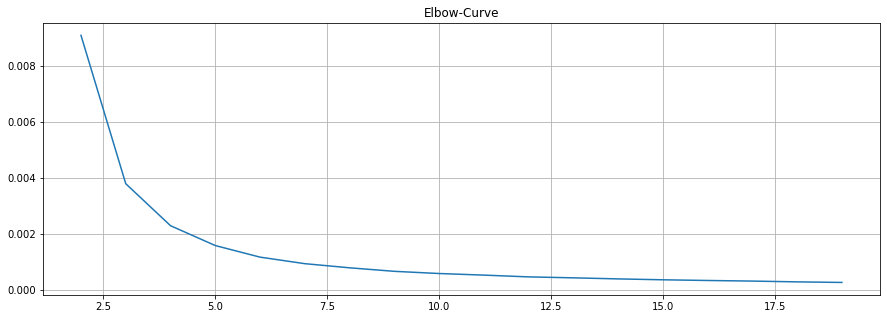

In [114]:
wcss =[]
for k in range(2,20):
    k_means = KMeans(n_clusters = k)
    k_means.fit(X)
    wcss.append(k_means.inertia_)
print(wcss)
fig = plt.figure(figsize=(15,5))
plt.plot(range(2,20),wcss)
plt.grid(True)
plt.title('Elbow-Curve')
plt.show()

In [117]:
from pylab import plot, show

In [118]:
centroids,_= kmeans(X, 5)

In [119]:
kmeans(X, 5)

(array([[ 3.91248743e-04,  7.12987708e-03],
        [ 1.88001422e-02,  2.33801822e-01],
        [ 3.05816714e-04,  9.94928118e-03],
        [-4.67112364e-04,  2.03357723e-02],
        [-1.70784729e-04,  1.35748732e-02]]),
 0.0013401571812334486)

In [120]:
idx,_ = vq(X, centroids)

In [121]:
vq(X, centroids)

(array([1, 4, 4, 1, 4, 1, 1, 0, 1, 0, 3, 4, 1, 1, 1, 4, 1, 3, 4, 4, 4, 1,
        4, 4, 3, 4, 4, 4, 4, 3, 1, 1, 1, 1, 1, 1, 4, 4, 1, 4, 4, 4, 1, 4,
        1, 3, 1, 4, 4, 1, 4, 4, 4, 4, 1, 4, 1, 4, 4, 4, 1, 0, 3, 3, 4, 4,
        4, 3, 1, 4, 1, 4, 1, 4, 3, 4, 3, 1, 1, 1, 3, 1, 1, 4, 0, 0, 1, 1,
        3, 4, 4, 4, 1, 4, 4, 1, 1, 1, 4, 0, 4, 0, 4, 0, 1, 1, 0, 4, 1, 4,
        1, 1, 4, 4, 0, 4, 1, 0, 4, 1, 4, 4, 1, 4, 0, 3, 1, 3, 3, 4, 1, 3,
        3, 4, 3, 3, 4, 3, 4, 4, 3, 4, 1, 3, 4, 3, 1, 4, 4, 1, 4, 3, 1, 1,
        3, 3, 3, 1, 3, 3, 3, 3, 0, 1, 3, 1, 3, 4, 1, 1, 4, 4, 1, 0, 3, 4,
        0, 4, 3, 3, 1, 4, 4, 4, 1, 4, 3, 4, 4, 4, 3, 1, 1, 3, 0, 3, 3, 3,
        1, 1, 4, 3, 1, 3, 4, 1, 1, 4, 4, 4, 1, 4, 4, 4, 1, 3, 3, 1, 3, 4,
        3, 4, 4, 1, 3, 4, 3, 3, 1, 4, 4, 3, 3, 4, 3, 3, 4, 1, 4, 3, 3, 4,
        3, 4, 4, 4, 4, 3, 1, 3, 4, 4, 3, 1, 1, 3, 4, 4, 3, 0, 3, 4, 3, 0,
        1, 1, 1, 4, 1, 3, 3, 4, 1, 3, 4, 4, 4, 4, 1, 4, 1, 1, 1, 4, 3, 4,
        3, 1, 3, 1, 3, 0, 4, 4, 1, 4, 

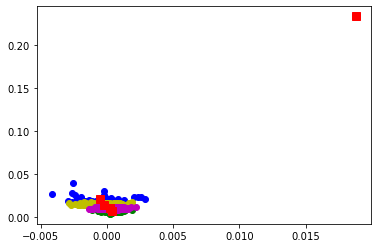

In [123]:
plot(X[idx==0,0],X[idx==0,1],'ob',
     X[idx==1,0],X[idx==1,1],'oy',
     X[idx==2,0],X[idx==2,1],'or',
     X[idx==3,0],X[idx==3,1],'og',
     X[idx==4,0],X[idx==4,1],'om')
plot(centroids[:,0],centroids[:,1],'sr',markersize=8)
show()

In [124]:
returns.head()

,Returns,Volatility
NASDAQ.AAL,0.000437,0.014269
NASDAQ.AAPL,0.000849,0.009839
NASDAQ.ADBE,0.001135,0.009599
NASDAQ.ADI,0.000197,0.012346
NASDAQ.ADP,0.000307,0.011004


In [125]:
returns.idxmax()

Returns       NYSE.XRX
Volatility    NYSE.XRX
dtype: object

In [128]:
returns.loc['NYSE.XRX',:]

Returns       0.018800
Volatility    0.233802
Name: NYSE.XRX, dtype: float64

looks like we have an outliers in the data and is skewing the results. deleting the outlier from our data set.

In [199]:
stock_data.drop(['NYSE.XRX'],inplace=True,axis=1)

returns = stock_data.pct_change().mean()*250
returns = pd.DataFrame(returns)
returns.columns = ['Returns']
returns['Volatility'] = stock_data.pct_change().std()*sqrt(250)

dta = np.asarray([np.asarray(returns.Returns), np.asarray(returns.Volatility)]).T

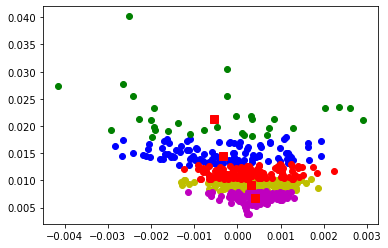

In [200]:
centroids,_= kmeans(dta, 5)
idx,_ = vq(dta, centroids)

# some plotting using numpy's logical indexing
plot(dta[idx==0,0],dta[idx==0,1],'ob',
     dta[idx==1,0],dta[idx==1,1],'oy',
     dta[idx==2,0],dta[idx==2,1],'or',
     dta[idx==3,0],dta[idx==3,1],'og',
     dta[idx==4,0],dta[idx==4,1],'om')
plot(centroids[:,0],centroids[:,1],'sr',markersize=8)
show()

In [201]:
details = [(name,cluster) for name, cluster in zip(returns.index,idx)]
details[:5]

[('NASDAQ.AAL', 0),
 ('NASDAQ.AAPL', 1),
 ('NASDAQ.ADBE', 1),
 ('NASDAQ.ADI', 2),
 ('NASDAQ.ADP', 2)]

# Problem 3: Identify which all stocks are moving together and which all stocks are different from each other.

In [142]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [145]:
dt = stock_data.copy()
dt

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,...,NYSE.WY,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.520,38.990,14.610,...,34.000,84.370,119.035,44.400,39.880,82.030,50.220,63.86,122.000,53.3500
1,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.480,39.010,14.710,...,34.070,84.370,119.035,44.110,39.880,82.030,50.220,63.74,121.770,53.3500
2,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.930,38.910,14.640,...,34.110,84.585,119.260,44.090,39.980,82.020,50.120,63.75,121.700,53.3650
3,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.440,38.840,14.630,...,33.970,84.460,119.260,44.250,39.990,82.020,50.160,63.88,121.700,53.3800
4,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.600,38.930,14.670,...,34.000,84.470,119.610,44.110,39.960,82.030,50.200,63.91,121.695,53.2400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41261,44.7200,164.1100,155.0900,83.670,106.5650,114.4900,47.150,142.425,45.130,12.985,...,32.650,99.675,99.530,49.485,40.955,76.360,62.110,76.88,114.310,62.7250
41262,44.7300,164.1200,155.1600,83.650,106.5900,114.5200,47.150,142.450,45.130,12.985,...,32.640,99.730,99.630,49.480,40.960,76.370,62.100,76.90,114.330,62.7100
41263,44.7400,164.0100,155.0650,83.620,106.5200,114.4700,47.150,142.330,45.135,12.970,...,32.620,99.735,99.640,49.495,40.940,76.315,62.090,76.88,114.310,62.6850
41264,44.7100,163.8800,154.9600,83.580,106.4000,114.3300,47.135,142.170,45.065,12.965,...,32.595,99.700,99.630,49.485,40.925,76.300,62.075,76.83,114.230,62.6301


In [227]:
X = dt.values
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

pca = PCA(n_components=150)
pca.fit(X_scaled)

PCA(n_components=150)

In [228]:
var = pca.explained_variance_ratio_
var1 = np.cumsum(np.round(var, decimals=4)*100)
print(var)
print(var1)

[4.69670304e-01 1.72650984e-01 1.20260867e-01 4.85659279e-02
 3.80311520e-02 2.81328043e-02 2.00339169e-02 1.30685806e-02
 1.05080894e-02 7.52675542e-03 6.83883520e-03 5.77949035e-03
 4.65061838e-03 4.50625646e-03 4.06099739e-03 3.45834106e-03
 3.31830346e-03 2.57157079e-03 2.32576265e-03 2.17574256e-03
 1.87869825e-03 1.56886431e-03 1.47979034e-03 1.32587780e-03
 1.26996898e-03 1.20082688e-03 1.10108606e-03 1.04457022e-03
 9.16846084e-04 8.34577194e-04 8.21384136e-04 7.90160448e-04
 6.98614887e-04 6.79619406e-04 6.22187556e-04 5.83101364e-04
 5.56704815e-04 5.29917541e-04 4.98946901e-04 4.90987669e-04
 4.48459398e-04 4.30415302e-04 3.92831851e-04 3.81351314e-04
 3.58179040e-04 3.31089189e-04 3.20204527e-04 3.13631552e-04
 2.86729345e-04 2.77139518e-04 2.71665739e-04 2.64634453e-04
 2.58939771e-04 2.47789758e-04 2.40598435e-04 2.27512990e-04
 2.24726341e-04 2.08338362e-04 2.00570939e-04 1.94941740e-04
 1.89960241e-04 1.79597199e-04 1.72700800e-04 1.67595439e-04
 1.63886857e-04 1.602746

In [229]:
np.round(var*100)

array([47., 17., 12.,  5.,  4.,  3.,  2.,  1.,  1.,  1.,  1.,  1.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.])

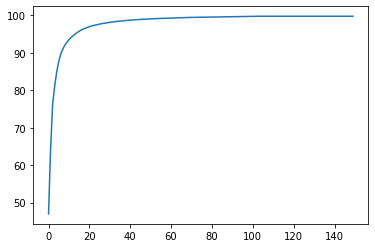

In [230]:
plt.plot(var1)

In [231]:
pca = PCA(n_components =25)
X1 = pca.fit_transform(X_scaled)
print(X1)

[[ 25.54489969   9.98399845  -9.36306484 ...   0.55486861   0.10672947
    2.41946379]
 [ 25.64396757   9.87058075  -9.78352591 ...   0.4568889    0.19358814
    2.31144711]
 [ 25.55832141   9.80326405  -9.65680691 ...   0.53324794   0.05944194
    2.05678867]
 ...
 [-22.74268953  13.34385803   6.52612773 ...  -2.13870005   1.21807613
   -0.32866293]
 [-22.58678189  13.43459792   6.63993624 ...  -2.12440981   1.22369126
   -0.35524473]
 [-22.69505715  13.37926134   6.56805244 ...  -2.16180039   1.20453745
   -0.31483266]]


In [232]:
pca.components_

array([[-0.03932727, -0.04119779, -0.06302875, ..., -0.06260427,
         0.00257534, -0.05182548],
       [-0.06427995,  0.03397585,  0.00193476, ..., -0.02032991,
        -0.08130274, -0.05943219],
       [-0.03996486,  0.06394349,  0.01187376, ...,  0.02086513,
        -0.06626943,  0.02349888],
       ...,
       [-0.01111637,  0.0046534 , -0.00478514, ..., -0.01181879,
         0.04413047, -0.01147759],
       [ 0.07449089, -0.01890913,  0.01015791, ..., -0.00156651,
        -0.0184516 ,  0.04840135],
       [-0.02234955,  0.03314339,  0.03674751, ..., -0.00424914,
        -0.02064573,  0.02461668]])

In [233]:
X1.shape

(41266, 25)

In [234]:
pca.explained_variance_

array([234.37116112,  86.15492862,  60.01162668,  24.23498532,
        18.97800476,  14.03860955,   9.99716677,   6.52137976,
         5.24366369,   3.75594197,   3.41266146,   2.88403558,
         2.32071481,   2.24867646,   2.02648681,   1.72575401,
         1.65587355,   1.28324492,   1.16058369,   1.08572184,
         0.93749313,   0.782882  ,   0.73843311,   0.66162536,
         0.63372843])

In [235]:
pca.explained_variance_ratio_

array([0.4696703 , 0.17265098, 0.12026087, 0.04856593, 0.03803115,
       0.0281328 , 0.02003392, 0.01306858, 0.01050809, 0.00752676,
       0.00683884, 0.00577949, 0.00465062, 0.00450626, 0.004061  ,
       0.00345834, 0.0033183 , 0.00257157, 0.00232576, 0.00217574,
       0.0018787 , 0.00156886, 0.00147979, 0.00132587, 0.00126997])

In [236]:
pca.mean_

array([ 1.76318461e-16, -3.38035550e-15, -6.29787503e-15,  3.79635686e-15,
       -1.04000342e-15,  3.99471513e-16, -4.24266297e-16,  1.11301029e-15,
       -2.32244473e-15,  3.12242087e-15, -8.73327377e-16, -1.60683973e-15,
        1.85134384e-15, -1.62819079e-15,  5.50995191e-17,  4.87630744e-16,
       -7.97290041e-15,  2.28663004e-16,  2.73982359e-15, -4.29225254e-15,
       -1.18463966e-15,  2.25908028e-16, -1.18188468e-15,  2.68334658e-15,
        1.71635002e-15, -1.33891831e-15, -3.74332358e-16,  2.77563827e-15,
       -2.05934453e-15, -7.45220996e-16,  8.26492786e-17,  2.20398076e-16,
        8.65062450e-16,  1.95603293e-15, -6.40531909e-16, -6.32266981e-16,
        2.44779614e-15, -8.43022642e-16,  1.40865364e-15,  4.95895672e-16,
       -1.04646040e-15,  9.57354144e-16, -6.90810220e-16, -2.23704047e-15,
       -4.08149688e-15,  3.73712488e-15, -1.24249416e-15, -3.27566641e-15,
        4.18205350e-15, -1.46564721e-15,  1.01383115e-15, -2.44366367e-15,
       -1.49664069e-15,  

In [237]:
X_scaled[:,0].mean()

1.7631846106197417e-16

In [238]:
pca.noise_variance_

0.025625968669622794

In [239]:
pca.singular_values_

array([3109.87555436, 1885.5193262 , 1573.65173247, 1000.02833423,
        884.9448381 ,  761.11971671,  642.28738648,  518.75305872,
        465.16640258,  393.6863541 ,  375.26454036,  344.97786598,
        309.4580693 ,  304.61719304,  289.17637873,  266.85808809,
        261.39935393,  230.11540942,  218.84123445,  211.6655662 ,
        196.68668997,  179.73765807,  174.56071255,  165.23307972,
        161.71210147])

In [240]:
dt.columns

Index(['NASDAQ.AAL', 'NASDAQ.AAPL', 'NASDAQ.ADBE', 'NASDAQ.ADI', 'NASDAQ.ADP',
       'NASDAQ.ADSK', 'NASDAQ.AKAM', 'NASDAQ.ALXN', 'NASDAQ.AMAT',
       'NASDAQ.AMD',
       ...
       'NYSE.WY', 'NYSE.WYN', 'NYSE.XEC', 'NYSE.XEL', 'NYSE.XL', 'NYSE.XOM',
       'NYSE.XYL', 'NYSE.YUM', 'NYSE.ZBH', 'NYSE.ZTS'],
      dtype='object', length=499)

In [241]:
pca.components_.shape

(25, 499)

In [242]:
dtt =pd.DataFrame(pca.components_,columns=dt.columns)
dtt

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,...,NYSE.WY,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,-0.039327,-0.041198,-0.063029,-0.009854,-0.035888,-0.054813,0.050489,-0.035384,-0.044205,-0.014613,...,0.044324,-0.049520,0.057072,-0.054750,-0.050685,0.047282,-0.061482,-0.062604,0.002575,-0.051825
1,-0.064280,0.033976,0.001935,-0.032403,0.043516,-0.029425,0.016081,0.058270,-0.052583,0.012303,...,-0.022112,-0.058897,0.030257,0.013746,-0.040753,-0.052867,0.031522,-0.020330,-0.081303,-0.059432
2,-0.039965,0.063943,0.011874,0.043297,-0.037457,0.040367,-0.053789,-0.051299,0.030592,-0.086503,...,-0.046046,-0.003326,0.022205,0.059502,-0.034738,-0.028530,-0.004580,0.020865,-0.066269,0.023499
3,0.007225,0.077156,0.008401,-0.028080,-0.018027,0.008762,-0.032382,0.034501,0.051270,-0.078063,...,-0.054202,0.021500,0.061063,-0.039785,0.027499,0.012080,0.002698,-0.002802,-0.049638,0.015167
4,-0.033182,-0.017369,0.002557,-0.038106,-0.101883,-0.034799,-0.010965,0.037455,-0.039823,-0.013665,...,-0.081522,-0.036786,-0.011903,-0.030101,-0.012076,-0.045974,-0.002891,-0.001254,-0.003203,0.005309
5,-0.031154,-0.033961,-0.036149,-0.125793,0.010857,-0.057454,0.035180,0.062003,-0.069906,-0.058309,...,-0.014060,0.028611,-0.007280,-0.003203,-0.002169,0.010890,0.001492,-0.007821,-0.029028,-0.010207
6,-0.030593,0.007909,0.044144,0.038217,-0.046712,0.004822,0.089067,0.026893,0.064106,0.043240,...,0.067080,0.014290,0.023499,0.012407,-0.007647,-0.065238,0.000632,-0.011906,0.061740,-0.012697
7,-0.040134,-0.026029,0.009560,-0.112089,0.051764,-0.006701,-0.016887,0.106386,-0.036793,0.009442,...,0.061529,0.068536,0.012310,0.000175,0.009643,0.011260,-0.011007,0.016867,0.023022,0.020097
8,-0.088704,0.046473,0.001524,0.095053,-0.048858,-0.009317,-0.061215,0.041162,-0.008148,-0.018256,...,0.002346,-0.030234,0.010535,0.020366,-0.101385,0.079882,0.026363,0.005798,0.002013,0.017772
9,0.006935,0.001431,-0.014214,-0.128464,-0.069352,-0.047887,-0.022429,-0.002987,0.040899,0.010031,...,-0.034604,-0.056096,-0.026400,-0.009769,0.001582,-0.022375,-0.023175,0.010953,0.033038,-0.014348


In [243]:
returns = dtt.pct_change().mean()
returns = pd.DataFrame(returns)
returns.columns = ['Returns']
returns['Volatility'] = dtt.pct_change().std()

dta = np.asarray([np.asarray(returns.Returns), np.asarray(returns.Volatility)]).T

[994961.3134618868, 344338.3274446743, 148752.52598532964, 94859.95921659304, 70920.44984457488, 52641.8831261335, 39751.45340111699, 30210.123936997457, 23297.769661252594, 15637.674060607047, 11194.37287565561, 9123.234366270412, 7801.769121748998, 6988.527944976325, 6193.73822708175, 5315.140567164517, 4771.221396471138, 3943.074767353085]


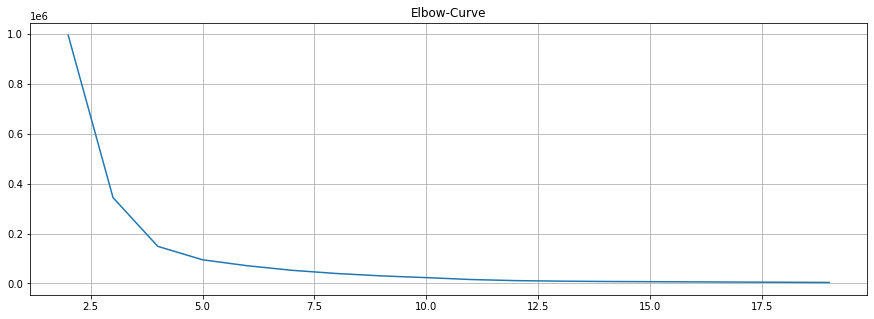

In [244]:
wcss =[]
for k in range(2,20):
    k_means = KMeans(n_clusters = k)
    k_means.fit(dta)
    wcss.append(k_means.inertia_)
print(wcss)
fig = plt.figure(figsize=(15,5))
plt.plot(range(2,20),wcss)
plt.grid(True)
plt.title('Elbow-Curve')
plt.show()

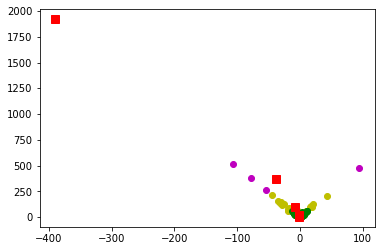

In [245]:
centroids,_= kmeans(dta, 5)
idx,_ = vq(dta, centroids)

# some plotting using numpy's logical indexing
plot(dta[idx==0,0],dta[idx==0,1],'ob',
     dta[idx==1,0],dta[idx==1,1],'oy',
     dta[idx==2,0],dta[idx==2,1],'or',
     dta[idx==3,0],dta[idx==3,1],'og',
     dta[idx==4,0],dta[idx==4,1],'om')
plot(centroids[:,0],centroids[:,1],'sr',markersize=8)
show()

In [249]:
pca.explained_variance_

array([234.37116112,  86.15492862,  60.01162668,  24.23498532,
        18.97800476,  14.03860955,   9.99716677,   6.52137976,
         5.24366369,   3.75594197,   3.41266146,   2.88403558,
         2.32071481,   2.24867646,   2.02648681,   1.72575401,
         1.65587355,   1.28324492,   1.16058369,   1.08572184,
         0.93749313,   0.782882  ,   0.73843311,   0.66162536,
         0.63372843])

In [247]:
pca.components_.shape

(25, 499)

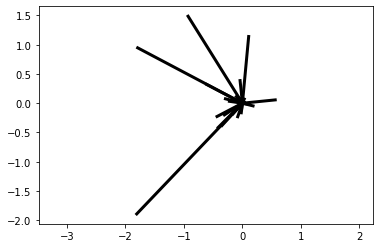

In [256]:
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    #print(v)
    plt.plot([0, v[0]], [0, v[1]], '-k', lw=3)
plt.axis('equal');